In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_excel("Raisin_Dataset/Raisin_Dataset.xlsx")
df_data.shape

(900, 8)

In [3]:
df_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
df_data.isnull().sum() #결측값 확인, 없음

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [5]:
#Class 숫자로 변경
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df_data['Class'] = label.fit_transform(df_data['Class'])

df_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


Text(0.5, 1.0, 'Label')

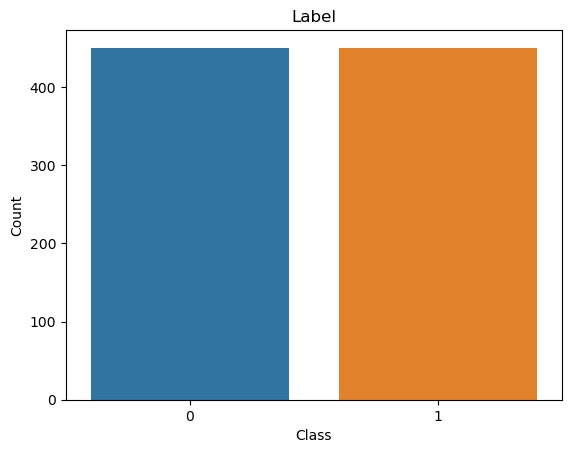

In [6]:
#EDA
sns.countplot(data = df_data, x="Class")
plt.ylabel("Count")
plt.title("Label")

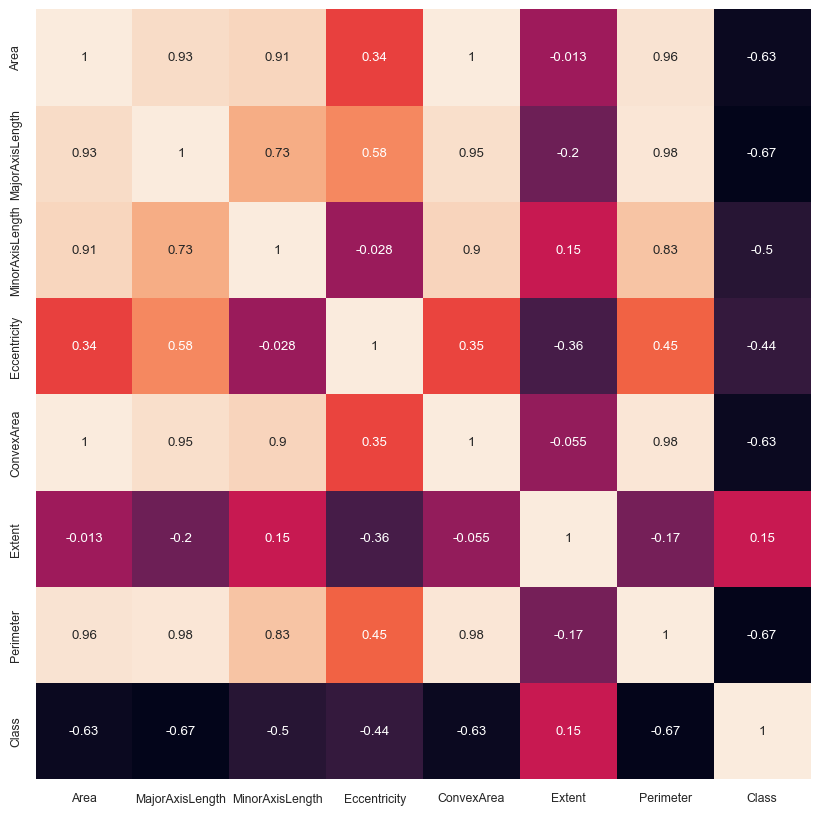

In [7]:
df_corr = df_data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [8]:
#Splitting the data into training and test test
X = df_data.iloc[:,0:6].values
Y = df_data.iloc[:,7].values

#one hot encoding (regression은 output이 1개이므로 필요 없음)
Y = pd.get_dummies(Y)
Y = Y.astype(int) #False, Trye로 나오는 걸 숫자로 변경

In [9]:
X.shape

(900, 6)

In [10]:
Y

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
895,1,0
896,1,0
897,1,0
898,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 나눈 데이터의 크기 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 6), (180, 6), (720, 2), (180, 2))

### FCN, Dense Layer

In [12]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import f1_score

model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Best F1 Score, callback function
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test), callbacks=[checkpoint])

best_model = load_model("best_model.h5")
y_pred = best_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

best_f1_score = f1_score(y_test, y_pred_class, average="binary")  # F1 점수 계산


# model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test, y_test))
# y_pred = model.predict(X_test)

# y_test_class = np.argmax(y_test,axis=1)
# y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
16/23 [===================>..........] - ETA: 0s - loss: 4.4385 - accuracy: 0.5137  
Epoch 1: val_accuracy improved from -inf to 0.46111, saving model to best_model.h5
23/23 [==============================] - 3s 32ms/step - loss: 3.3566 - accuracy: 0.5069 - val_loss: 0.6937 - val_accuracy: 0.4611
Epoch 2/100
15/23 [==================>...........] - ETA: 0s - loss: 0.6925 - accuracy: 0.5250
Epoch 2: val_accuracy did not improve from 0.46111
23/23 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5097 - val_loss: 0.6961 - val_accuracy: 0.4611
Epoch 3/100
13/23 [===============>..............] - ETA: 0s - loss: 0.6932 - accuracy: 0.5072
Epoch 3: val_accuracy did not improve from 0.46111
23/23 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6949 - val_accuracy: 0.4611
Epoch 4/100
14/23 [=================>............] - ETA: 0s - loss: 0.6939 - accuracy: 0.4844
Epoch 4: val_accuracy did not improve from 0.

23/23 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6944 - val_accuracy: 0.4611
Epoch 31/100
17/23 [=====================>........] - ETA: 0s - loss: 0.6930 - accuracy: 0.5147
Epoch 31: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5097 - val_loss: 0.6955 - val_accuracy: 0.4611
Epoch 32/100
15/23 [==================>...........] - ETA: 0s - loss: 0.6934 - accuracy: 0.5083
Epoch 32: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 33/100
18/23 [======================>.......] - ETA: 0s - loss: 0.6932 - accuracy: 0.4878
Epoch 33: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4792 - val_loss: 0.6932 - val_accuracy: 0.4611
Epoch 34/100
15/23 [==================>.

17/23 [=====================>........] - ETA: 0s - loss: 0.6928 - accuracy: 0.5184
Epoch 60: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6947 - val_accuracy: 0.4611
Epoch 61/100
18/23 [======================>.......] - ETA: 0s - loss: 0.6933 - accuracy: 0.5104
Epoch 61: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5097 - val_loss: 0.6941 - val_accuracy: 0.4611
Epoch 62/100
15/23 [==================>...........] - ETA: 0s - loss: 0.6933 - accuracy: 0.5021
Epoch 62: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6948 - val_accuracy: 0.4611
Epoch 63/100
14/23 [=================>............] - ETA: 0s - loss: 0.6926 - accuracy: 0.5179
Epoch 63: val_accuracy did not improve from 0.53889
23/23 [===========================

Epoch 90/100
14/23 [=================>............] - ETA: 0s - loss: 0.6944 - accuracy: 0.5022
Epoch 90: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.5097 - val_loss: 0.6950 - val_accuracy: 0.4611
Epoch 91/100
14/23 [=================>............] - ETA: 0s - loss: 0.6941 - accuracy: 0.4732
Epoch 91: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.4847 - val_loss: 0.6937 - val_accuracy: 0.4611
Epoch 92/100
15/23 [==================>...........] - ETA: 0s - loss: 0.6929 - accuracy: 0.5167
Epoch 92: val_accuracy did not improve from 0.53889
23/23 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.5097 - val_loss: 0.6965 - val_accuracy: 0.4611
Epoch 93/100
17/23 [=====================>........] - ETA: 0s - loss: 0.6929 - accuracy: 0.5165
Epoch 93: val_accuracy did not improve from 0.53889
23/23 [==============

ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [17]:
print("Best F1 Score:", best_f1_score)

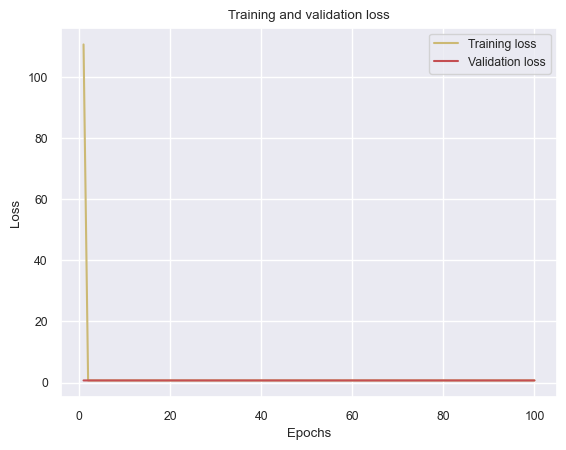

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

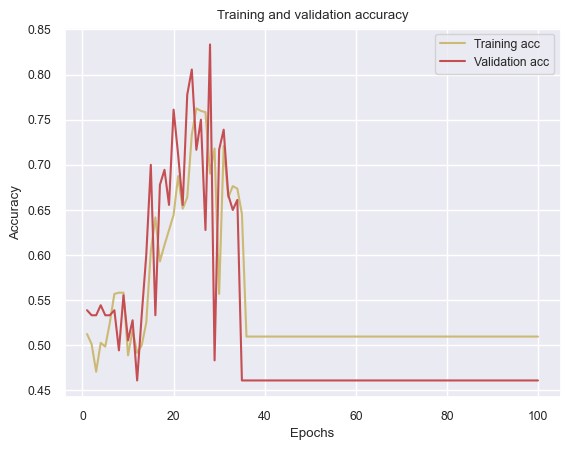

In [41]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
#CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 60)                7740      
                                                                 
 dense_17 (Dense)            (None, 2)                 122       
                                                                 
Total params: 8118 (31.71 KB)
Trainable params: 8118 (31.71 KB)
Non-trainable params: 0 (0.00 Byte)
____________________